In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from torch.utils.data import DataLoader, random_split

import sys, os
sys.path.append(os.path.join(os.path.dirname("./"), '..'))

from Models.ResNet import ResNet18
from Models.VisionTransformer import VisionTransformerModel
from Models.ViTResNetMixed import ViTResNet
from Models.ResNet import MiniResNet
from utils.Training import Train
from utils.CustomDataset import CustomDataset

In [3]:
# Loading the data
TestData, TestLabels = [], []
TrainData, TrainLabels = [], []

LabelToId = {'no': 0, 'sphere':1, 'vort':2}

# Walking through the train directory and loading the data
for root, dirs, files in os.walk("../dataset/DatasetTask1/train"):
    for dir in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(root, dir)):
            for file in files2:
                TrainData.append(np.load(os.path.join(root2, file)))
                TrainLabels.append(LabelToId[dir])

# Walking through the test directory and loading the data
for root, dirs, files in os.walk("../dataset/DatasetTask1/val"):
    for dir in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(root, dir)):
            for file in files2:
                TestData.append(np.load(os.path.join(root2, file)))
                TestLabels.append(LabelToId[dir])

TestData = np.array(TestData)
TrainData = np.array(TrainData)

In [4]:
np.unique(TrainLabels, return_counts=True), np.unique(TestLabels, return_counts=True)

((array([0, 1, 2]), array([10000, 10000, 10000])),
 (array([0, 1, 2]), array([2500, 2500, 2500])))

In [5]:
TestLabels = torch.Tensor(TestLabels)
TestData = torch.Tensor(TestData)
TrainLabels = torch.Tensor(TrainLabels)
TrainData = torch.Tensor(TrainData)

TestDataset = CustomDataset(TestData, TestLabels)
TrainDataset = CustomDataset(TrainData, TrainLabels)

# Splitting and creating the dataset into training and validation
TrainLen = int(0.9 * len(TrainDataset))
ValLen = len(TrainDataset) - TrainLen

TrainDataset, ValidationDataset = random_split(TrainDataset, lengths=[TrainLen, ValLen])

In [6]:
len(TrainDataset), len(ValidationDataset), len(TestDataset)

(27000, 3000, 7500)

In [7]:
TrainLoader = DataLoader(TrainDataset, batch_size=32, shuffle=True)
ValidationLoader = DataLoader(ValidationDataset, batch_size=32, shuffle=True)
TestLoader = DataLoader(TestDataset, batch_size=32, shuffle=True)

In [8]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.mps.is_available():
    device = torch.device("mps")   # I have a MacBook hence this option


# Building the model: 
model = VisionTransformerModel((1,150,150), 15, 256, 3).to(device)

print(f"Using device: {device}")

Using device: mps


100%|██████████| 94/94 [00:02<00:00, 40.91it/s]


Epoch 1/100 -
	Training Loss: 1.1132613899301014 
	Accuracy: 10.475118483412322
	AUC Score: 0.49828139172291036

	Val Loss: 1.113065945341232 
	Val Accuracy: 9.97872340425532
	Val AUC Score: 0.4903208504333749



100%|██████████| 94/94 [00:02<00:00, 41.55it/s]


Epoch 11/100 -
	Training Loss: 1.0995347023857713 
	Accuracy: 10.672985781990521
	AUC Score: 0.4989901210088385

	Val Loss: 1.0973988340256062 
	Val Accuracy: 11.127659574468085
	Val AUC Score: 0.49575843858354374



100%|██████████| 94/94 [00:02<00:00, 41.31it/s]


Epoch 21/100 -
	Training Loss: 1.0991210005294656 
	Accuracy: 10.625592417061611
	AUC Score: 0.49946355621160365

	Val Loss: 1.098299745549547 
	Val Accuracy: 10.957446808510639
	Val AUC Score: 0.4996257760108008



100%|██████████| 94/94 [00:02<00:00, 41.00it/s]


Epoch 31/100 -
	Training Loss: 1.098877393662647 
	Accuracy: 10.541469194312796
	AUC Score: 0.49972176701954285

	Val Loss: 1.0988141387066943 
	Val Accuracy: 10.553191489361701
	Val AUC Score: 0.49814235621620717



100%|██████████| 94/94 [00:02<00:00, 41.02it/s]


Epoch 41/100 -
	Training Loss: 1.098832084528078 
	Accuracy: 10.755924170616113
	AUC Score: 0.5005037711222904

	Val Loss: 1.0985119545713384 
	Val Accuracy: 11.01063829787234
	Val AUC Score: 0.49985352356395524



100%|██████████| 94/94 [00:02<00:00, 41.17it/s]


Epoch 51/100 -
	Training Loss: 1.0989918270947243 
	Accuracy: 10.593601895734597
	AUC Score: 0.499735096562156

	Val Loss: 1.0992344427616039 
	Val Accuracy: 9.797872340425531
	Val AUC Score: 0.4981508381929869



100%|██████████| 94/94 [00:02<00:00, 41.19it/s]


Epoch 61/100 -
	Training Loss: 1.0988149387294082 
	Accuracy: 10.619668246445498
	AUC Score: 0.4997499310024324

	Val Loss: 1.0995150360655277 
	Val Accuracy: 10.074468085106384
	Val AUC Score: 0.5013115950634017



100%|██████████| 94/94 [00:02<00:00, 41.00it/s]


Epoch 71/100 -
	Training Loss: 1.0987299872800638 
	Accuracy: 10.738151658767773
	AUC Score: 0.5002716664464254

	Val Loss: 1.0978847653307813 
	Val Accuracy: 10.787234042553191
	Val AUC Score: 0.49864690904730097



100%|██████████| 94/94 [00:02<00:00, 41.16it/s]


Epoch 81/100 -
	Training Loss: 1.0988443140734994 
	Accuracy: 10.464454976303317
	AUC Score: 0.500451623535664

	Val Loss: 1.0989977311580739 
	Val Accuracy: 10.638297872340425
	Val AUC Score: 0.500209848417147



100%|██████████| 94/94 [00:02<00:00, 40.54it/s]


Epoch 91/100 -
	Training Loss: 1.0988066265650835 
	Accuracy: 10.588862559241706
	AUC Score: 0.5005815112216843

	Val Loss: 1.0985452659586643 
	Val Accuracy: 10.861702127659575
	Val AUC Score: 0.5039472235624659



100%|██████████| 94/94 [00:02<00:00, 40.90it/s]


Final Performance:
	Training Loss: 1.099191105047956
	Test Loss: 1.0994734916281192
	Training Accuracy : 10.6496327014218
	Test Accuracy : 10.443510638297875
	Training AUC Score : 46.94979179587893
	Test AUC Score : 0.4996631470104201
Finished Training


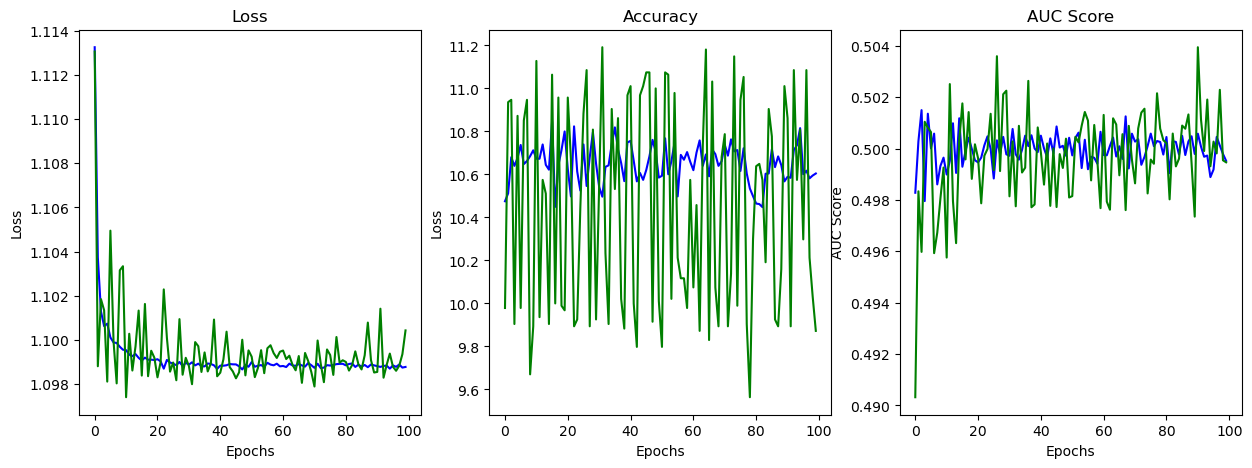

In [10]:
LossFunc = nn.CrossEntropyLoss()
Optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

Train(model, TrainLoader, ValidationLoader, LossFunc, Optimizer, 100, device)

In [11]:
torch.save(model, "../ModelWeights/VisionTransformClassifier.pth")